In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection as cv
import math
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [2]:
moon = pd.read_csv("moons400.csv")
moon.head()

,Class,X0,X1
0,1,2.071069,0.411529
1,0,-0.335398,1.032266
2,1,1.256631,-0.363937
3,1,1.269361,-0.379086
4,0,-0.839940,0.203669


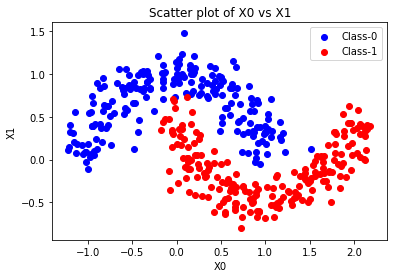

In [3]:
cla_0 = moon[moon.Class == 0]
cla_1 = moon[moon.Class == 1]
plt.scatter(cla_0["X0"], cla_0["X1"], color="blue", label="Class-0")
plt.scatter(cla_1["X0"], cla_1["X1"], color="red", label="Class-1")
plt.xlabel("X0")
plt.ylabel("X1")
plt.title("Scatter plot of X0 vs X1")
plt.legend()
plt.show()

In [4]:
np.random.seed(3)
class NeuralNet():
    def __init__(self, train, target, x_test, y_test, hidden_layers = 2, neu_hid_layer = 3, learning_rate=0.05, epoch=5000):
        self.train = train.as_matrix() # This is a training data set
        self.target = target # This is target column that needs to be predicted
        self.hidden_layers = hidden_layers 
        self.neu_hid_layer = neu_hid_layer 
        self.in_layer = train.as_matrix().shape[1] 
        self.op_ly = 1
        self.learning_rate = learning_rate 
        self.epoch = epoch
        self.x_test = x_test.as_matrix()
        self.y_test = y_test.as_matrix()
        self.predicted = None
        self.test_pred = None

        
        if self.hidden_layers == 1:
        # Initializing Random Weights
            self.wt_ly1 = np.random.randn(self.in_layer, self.neu_hid_layer)
            self.b_ly1 = np.ones((1, self.neu_hid_layer))
            self.wt_ly2 = np.random.randn(self.neu_hid_layer, self.op_ly)
            self.b_ly2 = np.ones((1, self.op_ly))
        
        elif self.hidden_layers == 2:
            self.wt_ly1 = np.random.randn(self.in_layer, self.neu_hid_layer)
            self.b_ly1 = np.ones((1, self.neu_hid_layer))
            self.wt_ly2 = np.random.randn(self.neu_hid_layer, self.neu_hid_layer)
            self.b_ly2 = np.ones((1, self.neu_hid_layer))
            self.wt_ly3 = np.random.randn(self.neu_hid_layer, self.op_ly)
            self.b_ly3 = np.ones((1, self.op_ly))
            
        
    def activation(self, z):
        return 1 / (1 + np.exp(-z))
    
    
    def gradient_descent(self, tdelta1, tdelta2, tb1, tb2, tdelta3=0, tb3=0): ## Need to see what can be done here
        if self.hidden_layers == 1:
            self.wt_ly1 = self.wt_ly1 - (self.learning_rate*tdelta1)
            self.wt_ly2 = self.wt_ly2 - (self.learning_rate * tdelta2)
            self.b_ly1 = self.b_ly1 - self.learning_rate*tb1
            self.b_ly2 = self.b_ly2 - self.learning_rate*tb2
        
        elif self.hidden_layers == 2:
            self.wt_ly1 = self.wt_ly1 - (self.learning_rate*tdelta1)
            self.wt_ly2 = self.wt_ly2 - (self.learning_rate * tdelta2)
            self.wt_ly3 = self.wt_ly3 - (self.learning_rate * tdelta3)
            self.b_ly1 = self.b_ly1 - self.learning_rate*tb1
            self.b_ly2 = self.b_ly2 - self.learning_rate*tb2
            self.b_ly3 = self.b_ly3 - self.learning_rate*tb3
    
    def propogation(self):
        
        if self.hidden_layers == 1:
            # Forward Propogation
            a1 = np.array(self.train)
            z2 = np.dot(self.train, self.wt_ly1) + self.b_ly1
            a2 = self.activation(z2)
            z3 = np.dot(a2, self.wt_ly2) + self.b_ly2
            a3 = self.activation(z3)
            error = a3 - np.array(self.target).reshape(len(self.target), 1)
        
        
            #Backward Propogation to find derivative
            delta2 = error * a3 * (1-a3)
            delta1 = np.dot(delta2,  self.wt_ly2.T) * a2 * (1-a2) #a2*(1-a2) is derivative of sigmoid function
            tdelta2 = np.dot(a2.T, delta2)
            tdelta1 = np.dot(self.train.T, delta1)
            tb2 = np.sum(delta2, axis=0).reshape(np.shape(self.b_ly2))
            tb1 = np.sum(delta1, axis=0).reshape(np.shape(self.b_ly1))

            # adjust weights by gradient descent
            self.gradient_descent(tdelta1, tdelta2, tb1, tb2)
        
            return a3, error
        
        elif self.hidden_layers == 2:
            #Forward Propogation
            a1 = np.array(self.train)
            z2 = np.dot(self.train, self.wt_ly1) + self.b_ly1
            a2 = self.activation(z2)
            z3 = np.dot(a2, self.wt_ly2) + self.b_ly2
            a3 = self.activation(z3)
            z4 = np.dot(a3, self.wt_ly3) + self.b_ly3
            a4 = self.activation(z4)
            error = a4 - np.array(self.target).reshape(len(self.target), 1)
            
            #Backward Propogation
            delta3 = error * a4 * (1-a4)
            delta2 = np.dot(delta3, self.wt_ly3.T) * a3 * (1-a3)
            delta1 = np.dot(delta2,  self.wt_ly2.T) * a2 * (1-a2) #a2*(1-a2) is derivative of sigmoid function
            
            tdelta3 = np.dot(a3.T, delta3)
            tdelta2 = np.dot(a2.T, delta2)
            tdelta1 = np.dot(self.train.T, delta1)
            tb3 = np.sum(delta3, axis=0).reshape(np.shape(self.b_ly3))
            tb2 = np.sum(delta2, axis=0).reshape(np.shape(self.b_ly2))
            tb1 = np.sum(delta1, axis=0).reshape(np.shape(self.b_ly1))
            
            # adjust weights by gradient descent
            self.gradient_descent(tdelta1, tdelta2, tb1, tb2, tdelta3, tb3)
            
            return a4, error
 
    def train_nn(self):
        TRMSE = []
        display = [2, 4, 5, 500, 1000, 2000, 3000, 4000, 5000, 5999]
        for ep in range(self.epoch):
            out, error = self.propogation()
            self.predicted = out
            RMSE = ((np.sum(error) ** 2)**(1/2))/len(self.target)
            TRMSE.append(RMSE)
            accuracy=1 - RMSE
            if ep in display:
                print("RMSE is: {0:.4f}, Accuracy is:  {1:.4f}, epoch is:{2}".format(RMSE, accuracy, ep))
            
        if self.hidden_layers == 1:
            
            result = {'Weigh1': self.wt_ly1, 
                      'Weight2':self.wt_ly2, 
                      'b1':self.b_ly1, 
                      'b2':self.b_ly2}
            
        elif self.hidden_layers == 2:
            
            result = {'Weigh1': self.wt_ly1, 
                      'Weight2':self.wt_ly2,
                      'Weight3':self.wt_ly3,
                      'b1':self.b_ly1, 
                      'b2':self.b_ly2,
                      'b3': self.b_ly3}
            
        #print("'This is 3 layer Neural Network'\n'Input Layer - 2'\n'Hidden Layer - 1 (3 neurons)\n'Output Layer - 1'\n'Activation Function - Sigmoid'")
        print(result)
        
        return TRMSE


    def predictClass(self):
        if self.hidden_layers == 1:
            # Feed Forward with suitable weights
            a1 = np.array(self.x_test)
            z2 = np.dot(a1, self.wt_ly1)
            a2 = self.activation(z2)
            z3 = np.dot(a2, self.wt_ly2)
            a3 = self.activation(z3)
            self.test_pred = np.round(a3)
        
        elif self.hidden_layers == 2:
            # Feed Forward with suitable weights
            a1 = np.array(self.x_test)
            z2 = np.dot(a1, self.wt_ly1) + self.b_ly1
            a2 = self.activation(z2)
            z3 = np.dot(a2, self.wt_ly2) + self.b_ly2
            a3 = self.activation(z3)
            z4 = np.dot(a3, self.wt_ly3) + self.b_ly3
            a4 = self.activation(z4)
            self.test_pred = np.round(a4)

RMSE is: 0.2425, Accuracy is:  0.7575, epoch is:2
RMSE is: 0.2079, Accuracy is:  0.7921, epoch is:4
RMSE is: 0.2562, Accuracy is:  0.7438, epoch is:5
RMSE is: 0.0264, Accuracy is:  0.9736, epoch is:500
RMSE is: 0.0023, Accuracy is:  0.9977, epoch is:1000
RMSE is: 0.0019, Accuracy is:  0.9981, epoch is:2000
RMSE is: 0.0026, Accuracy is:  0.9974, epoch is:3000
RMSE is: 0.0040, Accuracy is:  0.9960, epoch is:4000
{'Weigh1': array([[ 7.79970294,  5.60042696, -5.10118361],
       [-3.67656878,  3.9734781 ,  3.31126565]]), 'Weight2': array([[-5.44906526, -7.19731563, -3.28076217],
       [ 4.27576013,  7.75750041,  2.95763663],
       [ 4.35246081,  7.43844797,  2.49164258]]), 'Weight3': array([[ -7.05373168],
       [-11.38220833],
       [ -3.46764433]]), 'b1': array([[ 4.55553077, -4.78134498,  6.46934528]]), 'b2': array([[-0.36912613, -2.52200919, -0.87027071]]), 'b3': array([[ 9.4084226]])}


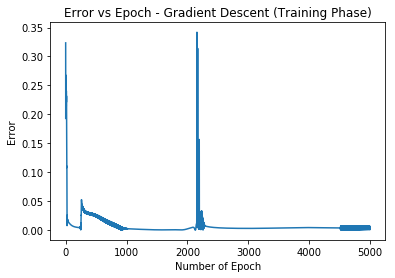

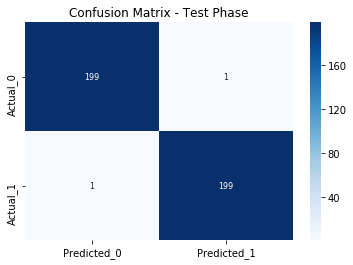

Test Accuracy:  0.995


In [12]:
 # Splitting the data for testing and training of neural networks (70 % training data and 30% testing data)
#x_train, x_test, y_train, y_test = cv.train_test_split(moon[["X0", "X1"]], moon["Class"], test_size=0.30, random_state=50)
x = moon[["X0", "X1"]]
y = moon["Class"]
x_train = x
y_train = y
x_test = x_train
y_test = y_train
inst = NeuralNet(x_train, y_train, x_test, y_test)

def main():
    trmse = inst.train_nn()
    inst.predictClass()
    plt.plot(trmse)
    plt.xlabel("Number of Epoch")
    plt.ylabel("Error")
    plt.title("Error vs Epoch - Gradient Descent (Training Phase)")
    plt.show()
    
    ax=plt.axes()
    arr = metrics.confusion_matrix(inst.y_test, inst.test_pred, sample_weight=None)
    con_df = pd.DataFrame(arr, columns = ["Predicted_0", "Predicted_1"], index=["Actual_0", "Actual_1"])
    sns.heatmap(con_df, annot=True,annot_kws={"size": 8}, fmt='g', cmap='Blues', ax=ax)
    ax.set_title('Confusion Matrix - Test Phase')
    plt.show()
    print('Test Accuracy: ', 1-np.sum(abs(inst.test_pred - inst.y_test.reshape(len(inst.y_test), 1)))/len(inst.y_test))
  

if __name__ == '__main__':
    main()

In [ ]:
inst.